In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set_style('ticks')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


from keras import models
from keras import layers
from keras import optimizers

from pathlib import Path

Using TensorFlow backend.


## Reading in the data

In [2]:
data_folder = Path.cwd().parent.joinpath('#task4-eda','datasets') 
input_filename = 'OUTPUT_WBI_exposer_cyclones_v12.csv'
input_file = Path(data_folder).joinpath(input_filename)
print(input_file)

G:\Omdena\wfpdisrel\#task4-eda\datasets\OUTPUT_WBI_exposer_cyclones_v12.csv


In [3]:
df = pd.read_csv(input_file,sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 51 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   SID                                                 1019 non-null   object 
 1   NAME                                                1019 non-null   object 
 2   ISO                                                 1019 non-null   object 
 3   YEAR                                                1019 non-null   int64  
 4   COORDS                                              1019 non-null   object 
 5   COORDS_MAX_WINDS                                    1019 non-null   object 
 6   COORDS_MIN_DIST2LAND                                1019 non-null   object 
 7   BASIN                                               1019 non-null   object 
 8   SUB BASIN                                           1019 non-null   object 
 9

In [4]:
df.head()

,SID,NAME,ISO,YEAR,COORDS,COORDS_MAX_WINDS,COORDS_MIN_DIST2LAND,BASIN,SUB BASIN,MONTH_START,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,TOTAL_AFFECTED
0,1949163N07145,DELLA,JPN,1949,"[(21.5, 125.424), (22.2, 125.8), (22.9089, 126...","[(27.6584, 128.82), (28.9141, 129.572999999999...","[(31.9866, 130.683), (33.5183, 130.97299999999...",WP,WP,6,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,1.198300e+07,5.803981e+06,3.320907e+06,194046
1,1950241N23140,JANE,JPN,1950,"[(23.8845, 139.74), (23.9335, 139.639), (23.98...","[(28.7509, 133.748), (29.1201, 133.762), (29.6...","[(34.9374, 135.476), (36.1016, 136.095), (37.2...",WP,WP,8,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,3.160822e+07,1.559196e+07,1.018936e+07,642117
2,1951224N12316,CHARLIE,JAM,1951,"[(17.3398, -75.4138), (17.6, -76.2), (17.9, -7...","[(17.6, -76.2), (17.9, -76.9)]","[(17.9, -76.9), (18.1, -77.8)]",NAm,CS,8,...,69.93,3796.219401,0.0,64.770000,2.578304,Low,1.689243e+06,1.687083e+06,1.195052e+06,20200
3,1951337N09150,AMY,PHL,1951,"[(12.0725, 130.967), (12.1333, 130.517), (12.1...","[(11.7833, 127.9)]","[(10.7333, 124.8), (10.534, 123.174), (10.6833...",WP,WP,12,...,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,4.760039e+06,3.006670e+06,1.114774e+06,60000
4,1952180N05144,EMMA,PHL,1952,"[(9.33776, 130.185), (9.38633, 129.61), (9.45,...","[(9.45, 129.017), (9.50407, 128.407), (9.56613...","[(10.4667, 123.867), (10.6492, 123.239), (10.8...",WP,WP,7,...,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,5.130796e+06,2.789486e+06,1.988524e+06,103


## Adding columns

In [5]:
df1 = df.copy()

### Here you can add any further features that you want to include

df1.reset_index(drop=True,inplace=True)

In [6]:
df1.isna().sum() 

SID                                                     0
NAME                                                    0
ISO                                                     0
YEAR                                                    0
COORDS                                                  0
COORDS_MAX_WINDS                                        0
COORDS_MIN_DIST2LAND                                    0
BASIN                                                   0
SUB BASIN                                               0
MONTH_START                                             0
MONTH_END                                               0
DATE_START                                              0
DATE_END                                                0
DATE_LAND_START                                         0
DATE_LAND_END                                           0
TOTAL_HOURS_EVENT                                       0
TOTAL_HOURS_IN_LAND                                     0
NATURE        

In [7]:
df1.dropna(subset=['POP_MAX_34_ADJ'], inplace=True)   ### delete rows with missing 'POP_MAX_34'  ## version 12
#df1.dropna(subset=['pop_max_34_adj'], inplace=True)  ## version 10

In [8]:
df1['TOTAL_AFFECTED'].describe()

count    9.400000e+02
mean     6.139378e+05
std      2.053699e+06
min      2.000000e+00
25%      3.130500e+03
50%      3.000000e+04
75%      2.746000e+05
max      2.962200e+07
Name: TOTAL_AFFECTED, dtype: float64

## Finding the feature with the heighest correlation, to stratify the train and test sets

In [9]:
corr_matrix = df1.corr()
corr_matrix['TOTAL_AFFECTED'].sort_values(ascending = False)

TOTAL_AFFECTED                                        1.000000
Net flows from UN agencies US$                        0.186385
34KN_POP                                              0.185251
96KN_POP                                              0.176227
64KN_POP                                              0.149334
POP_MAX_34_ADJ                                        0.136717
RURAL_POP(%)                                          0.119818
MAX_WIND                                              0.107496
TOTAL_HOURS_IN_LAND                                   0.101995
POP_MAX_50_ADJ                                        0.101608
MAX_USA_SSHS                                          0.084889
Cereal yield (kg per hectare)                         0.070278
YEAR                                                  0.070140
POP_DEN_SQ_KM                                         0.069116
TOTAL_DEATHS                                          0.057042
MONTH_END                                             0

In [10]:
strat_col = 'POP_MAX_34_ADJ'

In [11]:
df[strat_col].describe()

count    9.400000e+02
mean     3.325842e+07
std      8.772341e+07
min      0.000000e+00
25%      3.264921e+06
50%      1.153435e+07
75%      3.631258e+07
max      2.039539e+09
Name: POP_MAX_34_ADJ, dtype: float64

## Create the bins and make sure that the highest values of the column are included

In [12]:
bins = [0, 10000,100000, 500000,1000000, 5000000, 10000000, 25000000, 50000000 ,100000000, 500000000, max(df1[strat_col])]

In [13]:
df1[strat_col +'_cat']= pd.cut(df1[strat_col], bins, include_lowest=True)

In [14]:
df1[[strat_col +'_cat', strat_col]]

,POP_MAX_34_ADJ_cat,POP_MAX_34_ADJ
0,"(10000000.0, 25000000.0]",1.198300e+07
1,"(25000000.0, 50000000.0]",3.160822e+07
2,"(1000000.0, 5000000.0]",1.689243e+06
3,"(1000000.0, 5000000.0]",4.760039e+06
4,"(5000000.0, 10000000.0]",5.130796e+06
...,...,...
1013,"(1000000.0, 5000000.0]",3.900000e+06
1014,"(1000000.0, 5000000.0]",2.396895e+06
1015,"(100000.0, 500000.0]",2.341183e+05
1017,"(1000000.0, 5000000.0]",3.758703e+06


In [15]:
df1[strat_col +'_cat'].value_counts().sort_index()

(-0.001, 10000.0]                9
(10000.0, 100000.0]             36
(100000.0, 500000.0]            36
(500000.0, 1000000.0]           35
(1000000.0, 5000000.0]         191
(5000000.0, 10000000.0]        117
(10000000.0, 25000000.0]       206
(25000000.0, 50000000.0]       133
(50000000.0, 100000000.0]      103
(100000000.0, 500000000.0]      72
(500000000.0, 2039538625.0]      2
Name: POP_MAX_34_ADJ_cat, dtype: int64

### Check that there are no NaN in the column, because this will break StratifiedShuffleSplit

In [16]:
df1[strat_col +'_cat'].isna().sum()

0

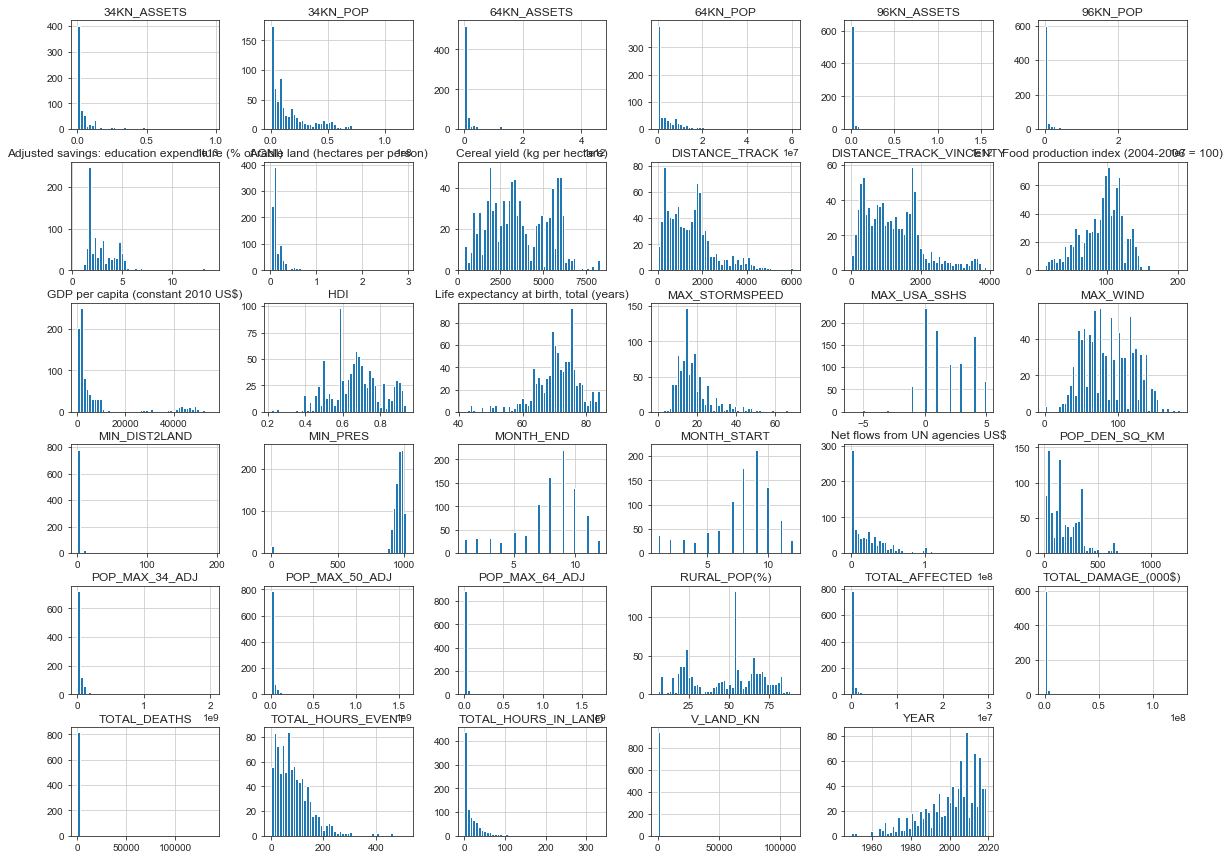

In [17]:
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
#Splitting into target and features
X = df1.drop('TOTAL_AFFECTED', axis=1)
X.head()

,SID,NAME,ISO,YEAR,COORDS,COORDS_MAX_WINDS,COORDS_MIN_DIST2LAND,BASIN,SUB BASIN,MONTH_START,...,Food production index (2004-2006 = 100),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Adjusted savings: education expenditure (% of GNI),Income_level_Final,POP_MAX_34_ADJ,POP_MAX_50_ADJ,POP_MAX_64_ADJ,POP_MAX_34_ADJ_cat
0,1949163N07145,DELLA,JPN,1949,"[(21.5, 125.424), (22.2, 125.8), (22.9089, 126...","[(27.6584, 128.82), (28.9141, 129.572999999999...","[(31.9866, 130.683), (33.5183, 130.97299999999...",WP,WP,6,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,1.198300e+07,5.803981e+06,3.320907e+06,"(10000000.0, 25000000.0]"
1,1950241N23140,JANE,JPN,1950,"[(23.8845, 139.74), (23.9335, 139.639), (23.98...","[(28.7509, 133.748), (29.1201, 133.762), (29.6...","[(34.9374, 135.476), (36.1016, 136.095), (37.2...",WP,WP,8,...,67.79,8607.657082,0.0,67.666098,2.867878,Low,3.160822e+07,1.559196e+07,1.018936e+07,"(25000000.0, 50000000.0]"
2,1951224N12316,CHARLIE,JAM,1951,"[(17.3398, -75.4138), (17.6, -76.2), (17.9, -7...","[(17.6, -76.2), (17.9, -76.9)]","[(17.9, -76.9), (18.1, -77.8)]",NAm,CS,8,...,69.93,3796.219401,0.0,64.770000,2.578304,Low,1.689243e+06,1.687083e+06,1.195052e+06,"(1000000.0, 5000000.0]"
3,1951337N09150,AMY,PHL,1951,"[(12.0725, 130.967), (12.1333, 130.517), (12.1...","[(11.7833, 127.9)]","[(10.7333, 124.8), (10.534, 123.174), (10.6833...",WP,WP,12,...,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,4.760039e+06,3.006670e+06,1.114774e+06,"(1000000.0, 5000000.0]"
4,1952180N05144,EMMA,PHL,1952,"[(9.33776, 130.185), (9.38633, 129.61), (9.45,...","[(9.45, 129.017), (9.50407, 128.407), (9.56613...","[(10.4667, 123.867), (10.6492, 123.239), (10.8...",WP,WP,7,...,25.68,1059.467412,0.0,61.105000,2.757732,Low_Middle,5.130796e+06,2.789486e+06,1.988524e+06,"(5000000.0, 10000000.0]"


In [19]:
y = df1['TOTAL_AFFECTED']
y.head()

0    194046
1    642117
2     20200
3     60000
4       103
Name: TOTAL_AFFECTED, dtype: int64

## Splitting the dataset using stratified sampling

In [20]:
test_split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
train_split = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)

for train_index, test_index in test_split.split(X, X[strat_col +'_cat']):
    train_set = X.iloc[train_index]
    prov_train_label = y.iloc[train_index]
    strat_test_set = X.iloc[test_index]
    strat_test_label = y.iloc[test_index]
    
for train_index, val_index in train_split.split(train_set, train_set[strat_col +'_cat']):
    strat_train_set = train_set.iloc[train_index]
    strat_train_label = prov_train_label.iloc[train_index]
    strat_val_set = train_set.iloc[val_index]
    strat_val_label = y.iloc[test_index]

In [21]:
strat_train_set.shape, strat_val_set.shape, strat_test_set.shape

((564, 51), (188, 51), (188, 51))

In [22]:
strat_train_label.shape, strat_val_label.shape, strat_test_label.shape

((564,), (188,), (188,))

In [23]:
## TODO: add assertion 